In [45]:
import pandas as pd
import matplotlib.cm as cm #pour créer une palette de couleurs basée sur le colormap
import matplotlib.pyplot as plt
import seaborn as sn
# On charge notre dataset
df = pd.read_csv("C:/Users/DELL/Desktop/force-N ADD/mesprojetperso/reported_numbers.csv")
df

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe
...,...,...,...,...,...
1939,Venezuela (Bolivarian Republic of),2000,29736.0,24.0,Americas
1940,Viet Nam,2000,74316.0,142.0,Western Pacific
1941,Yemen,2000,1394495.0,NaN,Eastern Mediterranean
1942,Zambia,2000,NaN,NaN,Africa


In [46]:
# On définit notre dictionnaire de traduction
translation_dict = {
    'Country': 'Pays',
    'Year': 'Années',
    'No. of cases': 'Nombre de cas',
    'No. of deaths': 'Nombre de décès',
    'WHO Region': 'Région de OMS'
}

In [47]:
# On renomme nos colonnes en utilisant notre dictionnaire de traduction
df.rename(columns=translation_dict, inplace=True)
df

,Pays,Années,Nombre de cas,Nombre de décès,Région de OMS
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe
...,...,...,...,...,...
1939,Venezuela (Bolivarian Republic of),2000,29736.0,24.0,Americas
1940,Viet Nam,2000,74316.0,142.0,Western Pacific
1941,Yemen,2000,1394495.0,NaN,Eastern Mediterranean
1942,Zambia,2000,NaN,NaN,Africa


In [48]:
#les dimensions de notre dataset
df.shape

(1944, 5)

In [49]:
#Statistique descriptive
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Années,1944.0,2008.500000,5.189462e+00,2000.0,2004.00,2008.5,2013.00,2017.0
Nombre de cas,1710.0,389730.251462,1.270270e+06,0.0,593.75,14792.0,117097.75,15330841.0
Nombre de décès,1675.0,1289.413731,4.290740e+03,0.0,1.00,30.0,669.50,51842.0


In [50]:
#les types de colonnes
df.dtypes

Pays                object
Années               int64
Nombre de cas      float64
Nombre de décès    float64
Région de OMS       object
dtype: object

In [51]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

Pays                 0
Années               0
Nombre de cas      234
Nombre de décès    269
Région de OMS        0
dtype: int64


In [52]:
# Remplacer les valeurs manquantes par le mode pour les colonnes numérique
cat_columns = df.select_dtypes(include=['number']).columns  # Sélectionner les colonnes catégorielles
cat_columns 


# In[25]:


for col in cat_columns:
    mode_val = df[col].mode()[0]  # Calculer le mode de la colonne
    df[col].fillna(mode_val, inplace=True)  # Remplacer les valeurs manquantes par le mode
# Afficher les premières lignes du DataFrame après le remplacement
df.head()


,Pays,Années,Nombre de cas,Nombre de décès,Région de OMS
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,0.0,Europe


In [53]:
# Afficher les doublons 
print("Les doublons  :")
duplicated_mask = df.duplicated()
print(duplicated_mask)

Les doublons  :
0       False
1       False
2       False
3       False
4       False
        ...  
1939    False
1940    False
1941    False
1942    False
1943    False
Length: 1944, dtype: bool


In [54]:
# Get sorted unique values in the  column
Pays = df['Pays'].sort_values().unique()
print(f'Les pays affectés par le paludisme sont :\n{Pays}')

nbPays = df['Pays'].sort_values().nunique()
print(f'Le nombre de pays affectés par le paludisme: \n {nbPays}')


Année = df['Années'].sort_values().unique()
print(f'Les années où le paludisme a débuté sont: \n{Année}' )

nbAnnée = df['Années'].sort_values().nunique()
print(f"Le nombre d'années que le paludisme a commencé à exister: \n{nbAnnée}")

Cas = df['Nombre de cas'].sort_values().unique()
print(f'Les cas qui existe:\n {Cas}' )

nbCas = df['Nombre de cas'].sort_values().nunique()
print(f"Le nombre de cas: \n{nbCas}")

Deces = df['Nombre de décès'].sort_values().unique()
print(f'Les décès:\n{Deces}')

nbDeces = df['Nombre de cas'].sort_values().nunique()
print(f"Le nombre de décès: \n{nbDeces}")

Les pays affectés par le paludisme sont :
['Afghanistan' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Azerbaijan'
 'Bangladesh' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Botswana' 'Brazil' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Côte d'Ivoire"
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Eswatini'
 'Ethiopia' 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Kazakhstan' 'Kenya' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Liberia' 'Madagascar' 'Malawi'
 'Malaysia' 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Morocco'
 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria'
 'Oman' 'Pakistan' 'Panama' 'Papua New Gu

In [55]:
#Quel est le pays dont le nombre de cas  est le plus élevé ? Quel était le taux de mortalité ?
# Trouver le pays avec le nombre de cas le plus élevé
max_cases_country = df.loc[df['Nombre de cas'].idxmax()]

# Extraire les informations pour ce pays
pays_max_cases = max_cases_country['Pays']
max_cases = max_cases_country['Nombre de cas']
nombre_de_décès = max_cases_country['Nombre de décès']

# Calculer le taux de mortalité
taux_mortalité = (nombre_de_décès / max_cases) * 100

print(f"Le pays avec le nombre de cas le plus élevé est {pays_max_cases}.")
print(f"Le nombre de cas est {max_cases}.")
print(f"Le taux de mortalité pour ce pays est de {taux_mortalité:.2f} %.")


Le pays avec le nombre de cas le plus élevé est Democratic Republic of the Congo.
Le nombre de cas est 15330841.0.
Le taux de mortalité pour ce pays est de 0.22 %.


In [56]:
#le nombre de cas maximun et minumun
cas_max = df['Nombre de cas'].max()
print(f'Le nombre de cas maximun est: {cas_max}')
cas_min = df['Nombre de cas'].min()
print(f'Le nombre de cas minimum est: {cas_min}')

Le nombre de cas maximun est: 15330841.0
Le nombre de cas minimum est: 0.0


In [57]:
#le nombre de décés maximun et minumun
deces_max = df['Nombre de cas'].max()
print(f'Le nombre de décès maximun est: {deces_max}')
deces_min = df['Nombre de cas'].min()
print(f'Le nombre de décès minimum est: {deces_min}')

Le nombre de décès maximun est: 15330841.0
Le nombre de décès minimum est: 0.0


In [58]:
# Le nombre de pays qui ont été affecté par le paludisme en 2014 et en 2017
# Filtrer les données pour les années 2014 et 2017
df_filtered = df[df['Années'].isin([2014, 2017])]
df_filtered

# Calculer le nombre unique de pays affectés en 2014
pays_2014 = df_filtered[df_filtered['Années'] == 2014]['Pays'].unique()
nb_pays_2014 = df_filtered[df_filtered['Années'] == 2014]['Pays'].nunique()


# Calculer le nombre unique de pays affectés en 2017
pays_2017 = df_filtered[df_filtered['Années'] == 2017]['Pays'].unique()
nb_pays_2017 = df_filtered[df_filtered['Années'] == 2017]['Pays'].nunique()


print(f"Les pays affectés par le paludisme en 2014 : {pays_2014}")
print(f"Le nombre de pays affectés par le paludisme en 2014 : {nb_pays_2014}")

print(f"Les pays affectés par le paludisme en 2017 : {pays_2017}")
print(f"Le nombre de pays affectés par le paludisme en 2017 : {nb_pays_2017}")


Les pays affectés par le paludisme en 2014 : ['Afghanistan' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Azerbaijan'
 'Bangladesh' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Botswana' 'Brazil' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Côte d'Ivoire"
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Eswatini'
 'Ethiopia' 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Kazakhstan' 'Kenya' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Liberia' 'Madagascar' 'Malawi'
 'Malaysia' 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Morocco'
 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria'
 'Oman' 'Pakistan' 'Panama' 'Papua New

In [59]:
# les région de l'OMS
OMS = df['Région de OMS'].unique()
print(OMS)

['Eastern Mediterranean' 'Africa' 'Americas' 'Europe' 'South-East Asia'
 'Western Pacific']


In [60]:
#Les nombres de cas obtenus en ['Eastern Mediterranean' 'Africa' 'Americas' 'Europe' 'South-East Asia'
# 'Western Pacific']
# pour la région Eastern Mediterranean
cas_EasternMediterranean = df[df['Région de OMS'] == 'Eastern Mediterranean']['Nombre de cas'].sum()
print(f'Le nombre de cas obtenus en Eastern Mediterranean est: {cas_EasternMediterranean}')

# pour la région Afrique
cas_afrique = df[df['Région de OMS'] == 'Africa']['Nombre de cas'].sum()
print(f'Le nombre de cas obtenus en Afrique est: {cas_afrique}')

# pour la région Amérique
cas_americ = df[df['Région de OMS'] == 'Americas']['Nombre de cas'].sum()
print(f'Le nombre de cas obtenus en Amérique est: {cas_americ}')

# pour la région Europe
cas_euro = df[df['Région de OMS'] == 'Europe']['Nombre de cas'].sum()
print(f'Le nombre de cas obtenus en Europe est: {cas_euro}')

# pour la région South-East Asia
cas_asie_sud_est = df[df['Région de OMS'] == 'South-East Asia']['Nombre de cas'].sum()
print(f"Le nombre de cas obtenus en Asie de Sud Est est: {cas_asie_sud_est}")

# pour la région Pacifique de l'Ouest
cas_paci_ouest = df[df['Région de OMS'] == 'Western Pacific']['Nombre de cas'].sum()
print(f"Le nombre de cas obtenus en Pacifique de l'Ouest est: {cas_paci_ouest}")

Le nombre de cas obtenus en Eastern Mediterranean est: 19932663.0
Le nombre de cas obtenus en Afrique est: 586002159.0
Le nombre de cas obtenus en Amérique est: 13894342.0
Le nombre de cas obtenus en Europe est: 112675.0
Le nombre de cas obtenus en Asie de Sud Est est: 39468640.0
Le nombre de cas obtenus en Pacifique de l'Ouest est: 7028251.0


In [61]:
# Afficher la répartition des valeurs pour chaque colonne catégorielle
for col in df.select_dtypes(include=['object']).columns:
    print(f'Répartition pour {col}:')
    print(df[col].value_counts())
    print()


Répartition pour Pays:
Gambia                              18
Democratic Republic of the Congo    18
United Republic of Tanzania         18
Guinea-Bissau                       18
Central African Republic            18
                                    ..
South Sudan                         18
Cameroon                            18
Suriname                            18
Timor-Leste                         18
Iran (Islamic Republic of)          18
Name: Pays, Length: 108, dtype: int64

Répartition pour Région de OMS:
Africa                   792
Americas                 378
Eastern Mediterranean    252
Western Pacific          198
South-East Asia          162
Europe                   162
Name: Région de OMS, dtype: int64



In [62]:
# Afficher la répartition des valeurs pour chaque colonne catégorielle
for col in df.select_dtypes(include=['number']).columns:
    print(f'Répartition pour {col}:')
    print(df[col].value_counts())
    print()

Répartition pour Années:
2017    108
2016    108
2001    108
2002    108
2003    108
2004    108
2005    108
2006    108
2007    108
2008    108
2009    108
2010    108
2011    108
2012    108
2013    108
2014    108
2015    108
2000    108
Name: Années, dtype: int64

Répartition pour Nombre de cas:
0.0          395
3.0           10
1.0            9
6.0            8
7.0            7
            ... 
64595.0        1
12983.0        1
628417.0       1
1002805.0      1
33458.0        1
Name: Nombre de cas, Length: 1426, dtype: int64

Répartition pour Nombre de décès:
0.0        674
1.0         88
2.0         43
3.0         27
4.0         26
          ... 
51842.0      1
468.0        1
5775.0       1
95.0         1
553.0        1
Name: Nombre de décès, Length: 708, dtype: int64



Le nombre de cas par années: Index(['Années', 'Nombre de cas'], dtype='object')


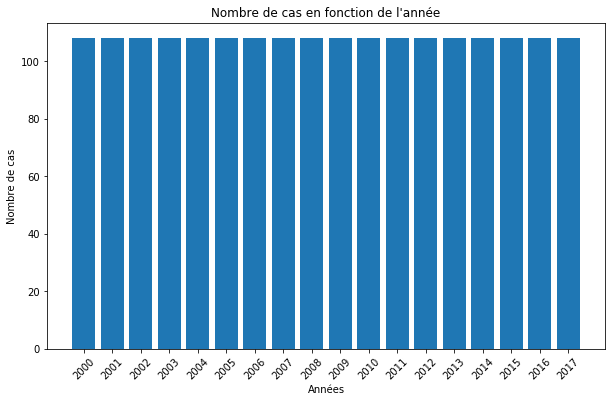

Le nombre de décès par années: Index(['Années', 'Nombre de décès'], dtype='object')


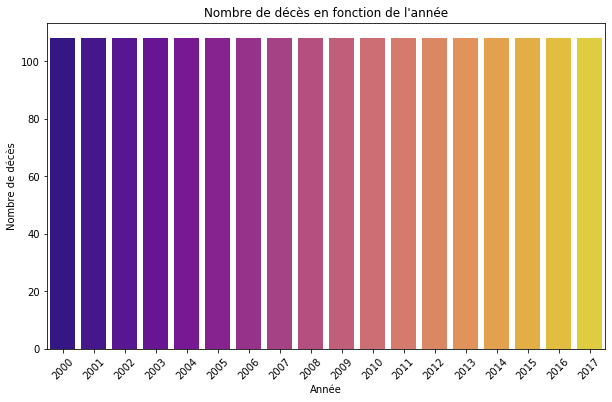

In [70]:
#Effectuons une analyse descriptive des données 
#Variables Numériques :
# le nombre de cas en fonction de l'année avec un histogramme

# Pour le nombre de cas

# Si les données sont sous forme de nombre de cas par ligne :
df_grouped = df.groupby('Années')['Nombre de cas'].sum().reset_index()
# Si les données sont simplement des entrées par ligne (chaque ligne représente un cas), alors on compte les occurrences :
df_grouped = df['Années'].value_counts().sort_index().reset_index()
df_grouped.columns = ['Années', 'Nombre de cas']
print(f'Le nombre de cas par années: {df_grouped.columns}')

# Créer l'histogramme avec matplotlib

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Années'].astype(str), df_grouped['Nombre de cas'])
plt.title('Nombre de cas en fonction de l\'année')
plt.xlabel('Années')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)  
plt.show()

# Pour le nombre de décès

# Si les données sont sous forme de nombre de cas par ligne :
df_grouped = df.groupby('Années')['Nombre de décès'].sum().reset_index()
# Si les données sont simplement des entrées par ligne (chaque ligne représente un cas), alors on compte les occurrences :
df_grouped = df['Années'].value_counts().sort_index().reset_index()
df_grouped.columns = ['Années', 'Nombre de décès']
print(f'Le nombre de décès par années: {df_grouped.columns}')

# Créer l'histogramme avec seaborn

plt.figure(figsize=(10, 6))
sns.barplot(x='Années', y='Nombre de décès', data=df_grouped, palette='plasma')
plt.title('Nombre de décès en fonction de l\'année')
plt.xlabel('Année')
plt.ylabel('Nombre de décès')
plt.xticks(rotation=45)  
plt.show()



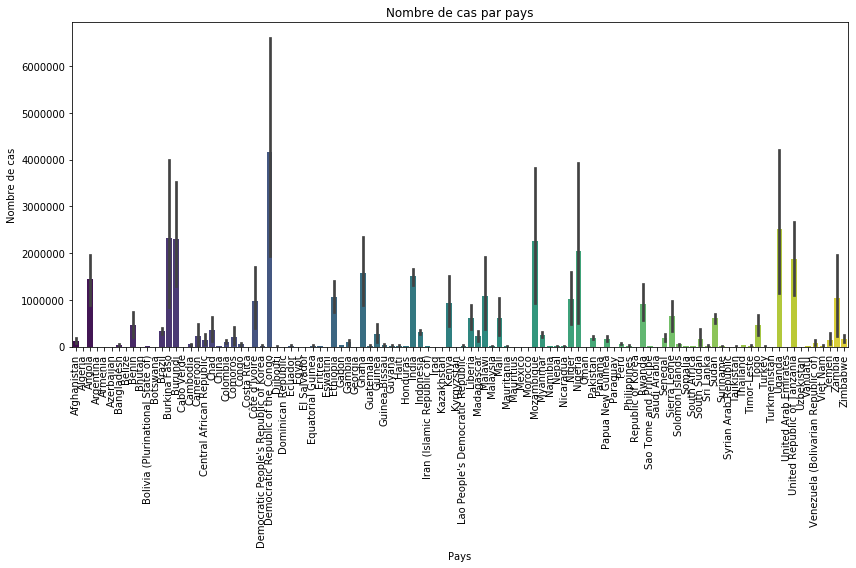

In [82]:
# Le diagramme en barres montrant le nombre de cas et les décès  pour chaque  pays
# Créer le diagramme en barres pour le nombre de cas
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, x='Pays', y='Nombre de cas', palette='viridis')
plt.title('Nombre de cas par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=90)  
plt.tight_layout()       
plt.show()

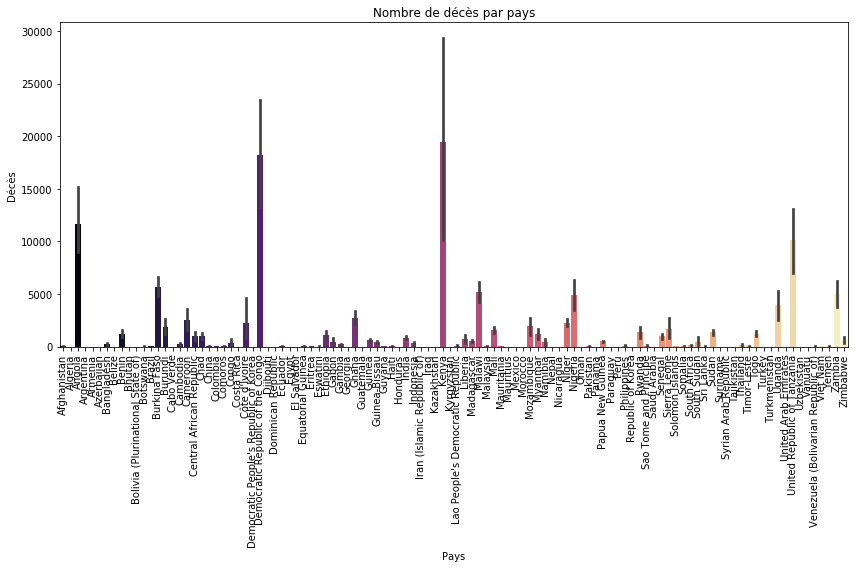

In [83]:
# Créer le diagramme en barres pour les décès
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, x='Pays', y='Nombre de décès', palette='magma')
plt.title('Nombre de décès par pays')
plt.xlabel('Pays')
plt.ylabel('Décès')
plt.xticks(rotation=90)  
plt.tight_layout()       
plt.show()

Le nombre de cas par Région de OMS: Index(['Région de OMS', 'Nombre de cas'], dtype='object')


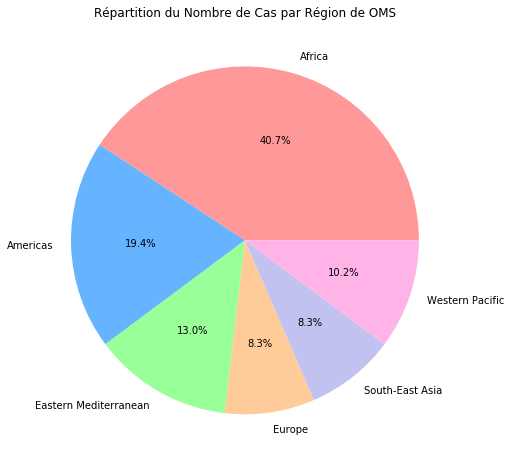

Le nombre de décès par Région de OMS: Index(['Région de OMS', 'Nombre de décès'], dtype='object')


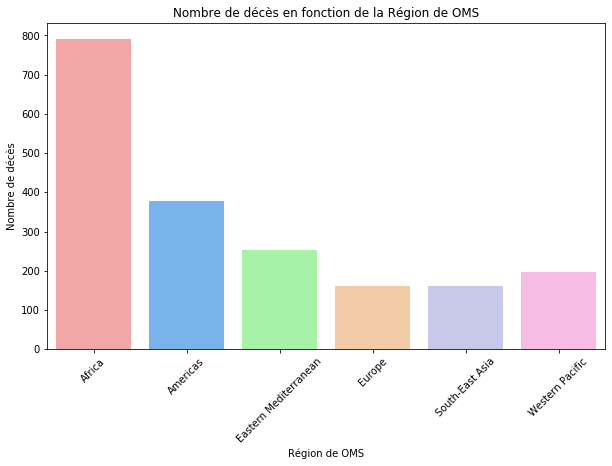

In [92]:
# Pour le nombre de cas

# Si les données sont sous forme de nombre de cas par ligne :
df_grouped = df.groupby('Région de OMS')['Nombre de cas'].sum().reset_index()
# Si les données sont simplement des entrées par ligne (chaque ligne représente un cas), alors on compte les occurrences :
df_grouped = df['Région de OMS'].value_counts().sort_index().reset_index()
df_grouped.columns = ['Région de OMS', 'Nombre de cas']
print(f'Le nombre de cas par Région de OMS: {df_grouped.columns}')

# Créer le diagramme circulaire pour le nombre de cas
# Liste des couleurs pour chaque région
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2']
plt.figure(figsize=(10, 8))
plt.pie(df_grouped['Nombre de cas'], labels=df_grouped['Région de OMS'], autopct='%1.1f%%', colors=colors)
plt.title('Répartition du Nombre de Cas par Région de OMS')
plt.show()

# Pour le nombre de décès

# Si les données sont sous forme de nombre de cas par ligne :
df_grouped = df.groupby('Région de OMS')['Nombre de décès'].sum().reset_index()
# Si les données sont simplement des entrées par ligne (chaque ligne représente un cas), alors on compte les occurrences :
df_grouped = df['Région de OMS'].value_counts().sort_index().reset_index()
df_grouped.columns = ['Région de OMS', 'Nombre de décès']
print(f'Le nombre de décès par Région de OMS: {df_grouped.columns}')

# Créer l'histogramme avec seaborn
palette = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2']
plt.figure(figsize=(10, 6))
sns.barplot(x='Région de OMS', y='Nombre de décès', data=df_grouped, palette=palette)
plt.title('Nombre de décès en fonction de la Région de OMS')
plt.xlabel('Région de OMS')
plt.ylabel('Nombre de décès')
plt.xticks(rotation=45)  
plt.show()
